Source:
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


Data Set Information:
This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Target variable is miles per gallon. All other variables are considered as independent variables or features. First, I look at the target variable. Then, I look at the nature of x-variables or features. I use boxplots to see the nature of continuous variables and histograms for discrete variables (ex: cylinders, origin, and year)

The purpose of the data analysis is develop a model to predict mpg using given features of a particular car

Data cleaning:
There were no nan values. However, at a closer look, Horsepower has object data type which supposed to be either int or float. When looked at closely, there are some values indicated by '?'. Since, it was only a few rows, we removed the rows corresponding to that. 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [29]:
#load data
data =  pd.read_csv('auto-mpg_data.csv',sep=",")

# Add column names
data.columns =['mpg', 'Cylinders', 'Displacement', 'Horsepower','Weight','Acceleration','Year','Origin','Name']

In [30]:
data.head()

,mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


(array([13., 78., 72., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

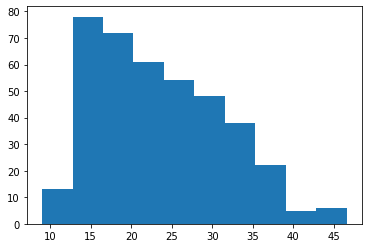

In [31]:
# plot y variable- mpg
plt.hist(data['mpg'])

(array([ 3., 10., 40., 46., 65., 60., 67., 58., 39.,  9.]),
 array([2.19722458, 2.36166217, 2.52609977, 2.69053737, 2.85497496,
        3.01941256, 3.18385016, 3.34828775, 3.51272535, 3.67716294,
        3.84160054]),
 <BarContainer object of 10 artists>)

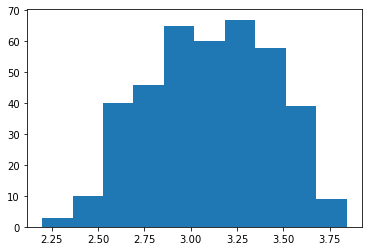

In [32]:
#log transform
log_mpg= np.log(data['mpg'])
plt.hist(log_mpg)


Lambda value used for Transformation: 0.20339134822540325


/Users/hashiniwanniarachchi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/hashiniwanniarachchi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


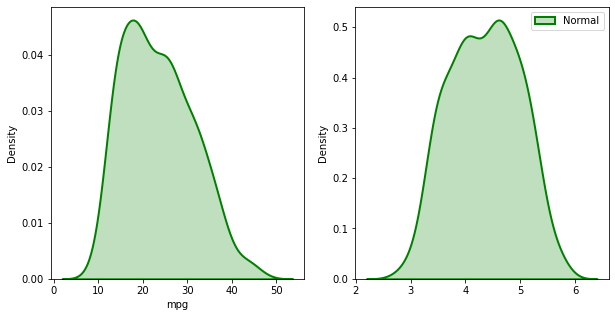

In [33]:
fitted_data, fitted_lambda = stats.boxcox(data['mpg'])

fig, ax = plt.subplots(1,2)

sns.distplot(data['mpg'], hist=False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])


sns.distplot(fitted_data, hist= False, kde = True,
             kde_kws={'shade': True, 'linewidth':2},
             label="Normal", color = 'green', ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

#  Model 1-Linear Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   Cylinders     397 non-null    int64  
 2   Displacement  397 non-null    float64
 3   Horsepower    397 non-null    object 
 4   Weight        397 non-null    int64  
 5   Acceleration  397 non-null    float64
 6   Year          397 non-null    int64  
 7   Origin        397 non-null    int64  
 8   Name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [36]:
data['Horsepower'].unique()

array(['165', '150', '140', '198', '220', '215', '225', '190', '170',
       '160', '95', '97', '85', '88', '46', '87', '90', '113', '200',
       '210', '193', '?', '100', '105', '175', '153', '180', '110', '72',
       '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '130', '112', '92', '145', '137', '158', '167', '94', '107', '230',
       '49', '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [37]:
# dropping possible NAN and '?'
data.dropna(inplace = True)
 
data = data.loc[data["Horsepower"] != '?']
data.shape

(391, 9)

In [38]:
#Descriptive Statistics for numberical variables. Origin probably have converted to a dummy variable previously
num_features = data[['Cylinders','Displacement','Horsepower','Weight','Acceleration','Year','Origin']]
num_features.describe()

,Cylinders,Displacement,Weight,Acceleration,Year,Origin
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,5.465473,194.124041,2976.237852,15.550384,75.994885,1.578005
std,1.703152,104.622462,850.071941,2.756557,3.675975,0.806020
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,105.000000,2224.500000,13.800000,73.000000,1.000000
50%,4.000000,151.000000,2800.000000,15.500000,76.000000,1.000000
75%,8.000000,264.500000,3616.500000,17.050000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:>

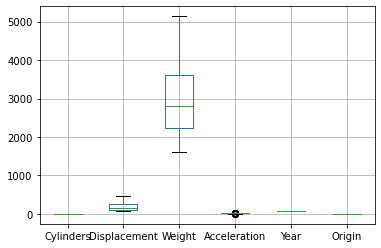

In [39]:
num_features.boxplot()

In [40]:
# Since the scale for the variables are off, I decided to standardize the variables using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features=num_features[['Displacement','Horsepower','Weight','Acceleration','Year','Cylinders','Origin']]
cat_features= num_features[['Cylinders','Origin', 'Year']]

<AxesSubplot:>

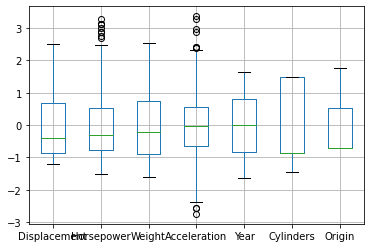

In [41]:
df_scaled = pd.DataFrame(scaler.fit_transform(scaled_features),columns = scaled_features.columns)
df_scaled.boxplot()

array([[<AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Origin'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

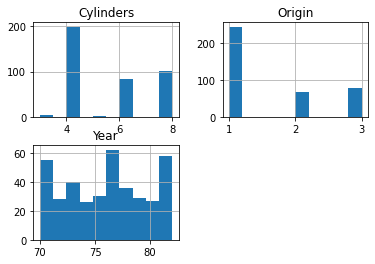

In [42]:
cat_features.hist()

In [43]:
scaled_features['Horsepower']=scaled_features['Horsepower'].astype(int)

In [44]:
X= scaled_features
y= data.iloc[:,0]

#Cleaned data for the model
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 396
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Displacement  391 non-null    float64
 1   Horsepower    391 non-null    int64  
 2   Weight        391 non-null    int64  
 3   Acceleration  391 non-null    float64
 4   Year          391 non-null    int64  
 5   Cylinders     391 non-null    int64  
 6   Origin        391 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 24.4 KB


In [45]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
lr= LinearRegression()
model=lr.fit(X_train,y_train)

In [47]:
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(X_train)
#print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8256216185691592
intercept: -16.877740405699072
slope: [ 0.01407737 -0.01931856 -0.0067647   0.09510073  0.74618466 -0.06037084
  1.28220935]


In [48]:
print('Model is : mpg = ' + str(model.intercept_) + ' Displacement + '+ str(model.coef_[0])+' Horsepower ' 
      +str(model.coef_[1])+ ' Weight'+str(model.coef_[2])+ ' Acceleration'+str(model.coef_[3])+ ' Year'+str(model.coef_[4])
      + ' Year'+str(model.coef_[5])+ ' Cylinders'+str(model.coef_[1])+ ' Origin')

Model is : mpg = -16.877740405699072 Displacement + 0.014077365205910252 Horsepower -0.01931855575555877 Weight-0.006764696724213742 Acceleration0.09510072704417658 Year0.7461846558116154 Year-0.060370835474406796 Cylinders-0.01931855575555877 Origin


In [49]:
#Evaluating model parameters

y_test_pred= model.predict(X_test)
import sklearn.metrics as sm1


print("Mean absolute error =", round(sm1.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm1.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm1.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm1.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))


Mean absolute error = 2.65
Mean squared error = 11.8
Median absolute error = 2.01
Explain variance score = 0.81
R2 score = 0.8


# Model 2-Ridge Regression

In [50]:
from sklearn.linear_model import Ridge

In [51]:
clf = Ridge(alpha=0.1)
mor= clf.fit(X_train, y_train)

In [52]:
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = mor.score(X_train, y_train)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', mor.intercept_)

# Print the Slope:
print('slope:', mor.coef_) 

# Predict a Response and print it:
y_pred = mor.predict(X_train)
#print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8256216089588333
intercept: -16.874071122654925
slope: [ 0.01406458 -0.01930521 -0.00676489  0.09509254  0.74616767 -0.06012755
  1.28098541]


In [53]:
#model evaluation
y_test_pred= mor.predict(X_test)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 2.65
Mean squared error = 11.8
Median absolute error = 2.01
Explain variance score = 0.81
R2 score = 0.8


In [54]:
'''
from scipy.special import inv_boxcox
y_pred_real=inv_boxcox(y_test_pred, fitted_lambda)
y_test1=inv_boxcox(y_test, fitted_lambda)
'''

'\nfrom scipy.special import inv_boxcox\ny_pred_real=inv_boxcox(y_test_pred, fitted_lambda)\ny_test1=inv_boxcox(y_test, fitted_lambda)\n'

In [55]:
'''
y_pred_real.shape
'''

'\ny_pred_real.shape\n'

In [56]:
'''
y_test_no_transform.shape
'''

'\ny_test_no_transform.shape\n'

In [57]:
'''
predicted= pd.DataFrame([y_pred_real,y_test_no_transform,y_test1]).T
print(predicted)
'''

'\npredicted= pd.DataFrame([y_pred_real,y_test_no_transform,y_test1]).T\nprint(predicted)\n'

# Model 3-Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

In [59]:
cll = Lasso(alpha=0.1)
mor= cll.fit(X_train, y_train)

In [60]:
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = mor.score(X_train, y_train)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', mor.intercept_)

# Print the Slope:
print('slope:', mor.coef_) 

# Predict a Response and print it:
y_pred = mor.predict(X_train)
#print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8251082469264684
intercept: -15.19025764042528
slope: [ 0.01072188 -0.01874867 -0.00670707  0.06438736  0.73694621 -0.
  1.01766726]


In [61]:
#model evaluation
y_test_pred= mor.predict(X_test)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 2.68
Mean squared error = 11.93
Median absolute error = 2.04
Explain variance score = 0.81
R2 score = 0.8


#  Model 4-using boxcox values

In [62]:
fitted_data, fitted_lambda = stats.boxcox(data['mpg'])
y_t=fitted_data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_t, test_size=0.3, random_state=42)

In [64]:
lr= LinearRegression()
model=lr.fit(X_train,y_train)

In [65]:
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(X_train)
#print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8781058202771481
intercept: 1.6302901569561845
slope: [ 0.00089098 -0.00277221 -0.00049951 -0.00043443  0.05607909 -0.01799219
  0.07589064]


In [66]:
#model evaluation
y_test_pred= model.predict(X_test)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.18
Mean squared error = 0.06
Median absolute error = 0.12
Explain variance score = 0.85
R2 score = 0.85


# Model 5-Feature Engineering

In [67]:
data['wxa']= data['Weight']*data['Acceleration']
data.head()

,mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Name,wxa
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,42469.5
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,37796.0
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,41196.0
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino,36214.5
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,43410.0


In [68]:
features=data[['Cylinders','Displacement','Horsepower','Year','Origin','wxa']]
df_scaled = pd.DataFrame(scaler.fit_transform(features),columns = features.columns)

In [69]:
X=df_scaled
y=data.loc[:,'mpg']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     391 non-null    float64
 1   Displacement  391 non-null    float64
 2   Horsepower    391 non-null    float64
 3   Year          391 non-null    float64
 4   Origin        391 non-null    float64
 5   wxa           391 non-null    float64
dtypes: float64(6)
memory usage: 18.5 KB


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [71]:
lr= LinearRegression()
model=lr.fit(X_train,y_train)

In [72]:
 # Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(X_train)
#print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8111953324529706
intercept: 23.572545058796184
slope: [-0.37805351  0.08547572 -3.63141181  2.54557823  1.04557209 -2.28804342]


In [73]:
y_test_pred= model.predict(X_test)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))
y_test_no_transform= y_test_pred

Mean absolute error = 2.55
Mean squared error = 11.48
Median absolute error = 1.92
Explain variance score = 0.81
R2 score = 0.81


# Model 6 -Polynomial features

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
features=data[['Cylinders','Displacement','Weight','Acceleration','Horsepower','Year','Origin']]
df_scaled = pd.DataFrame(scaler.fit_transform(features),columns = features.columns)
X= scaled_features
y= data.iloc[:,0]
X.head()

,Displacement,Horsepower,Weight,Acceleration,Year,Cylinders,Origin
0,350.0,165,3693,11.5,70,8,1
1,318.0,150,3436,11.0,70,8,1
2,304.0,150,3433,12.0,70,8,1
3,302.0,140,3449,10.5,70,8,1
4,429.0,198,4341,10.0,70,8,1


In [76]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [78]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [79]:
# There are 35 coefficients coming from polynomial fit
poly_reg_model.coef_.shape

(35,)

In [80]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

2.8374731654481375

In [81]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, poly_reg_y_predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, poly_reg_y_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, poly_reg_y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, poly_reg_y_predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, poly_reg_y_predicted), 2))

Mean absolute error = 2.08
Mean squared error = 8.05
Median absolute error = 1.44
Explain variance score = 0.87
R2 score = 0.87



# Observations, intepretations and Conclusion 

Considering all the models, the least mean squared error is coming from model with boxcox transformation (model 4) and polynomial features model (model 6). Miles per gallon has an impact from multiple features such as number of cylinders, acceleration, weight, displacement, origin of the vehicle, manufacturing year and horsepower

Linear regression and ridge regression doesnt show much differenece between them. 

Polynomial regression have highest R square out of all the six models.